<a href="https://colab.research.google.com/github/catastropiyush/course_notes/blob/main/Numerical_Methods_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

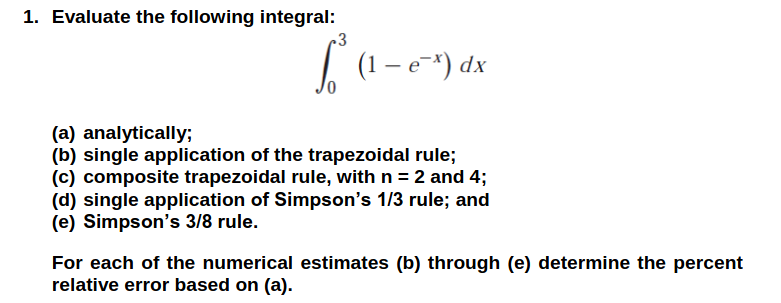

In [12]:
!pip install smplotlib
import smplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 5.7 MB/s eta 0:00:00


In [15]:
import numpy as np
import matplotlib.pyplot as plt

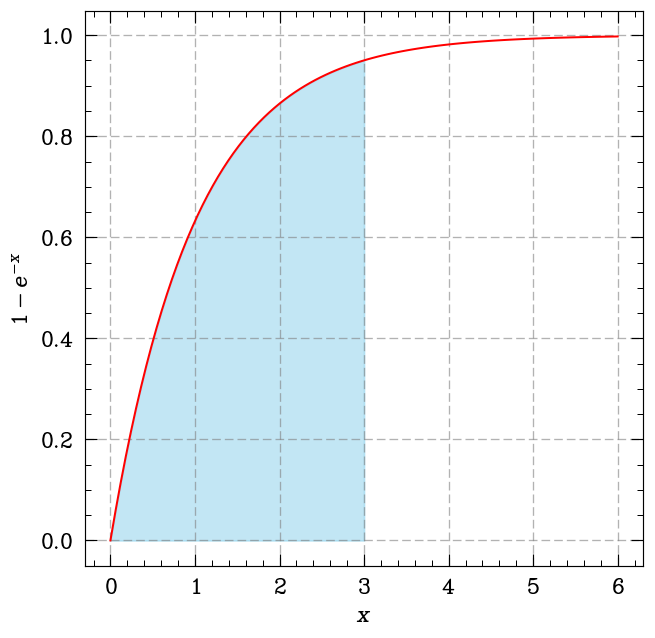

In [76]:
def func(x):
  return 1 - np.exp(-x)
x = np.linspace(0, 6, 100)
y = func(x)

plt.plot(x, y,color='red')
plt.xlabel(r"$x$")
plt.ylabel(r'$1 - e^{-x}$')
plt.grid(True)

x_fill = np.linspace(0, 3, 100)
y_fill = func(x_fill)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5)

plt.show()

In [43]:
import numpy as np

def analytical_solution():
    return np.exp(-3)+2

def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = 1 - np.exp(-x)
    integral = h * (y[0] + y[-1]) / 2
    for i in range(1, n):
        integral += h * y[i]

    return integral

def simpson_13_rule(n):
    x        = np.linspace(0, 3, n+1)
    y        = 1 - np.exp(-x)
    integral = np.sum(y[:-1:2]) * 2 + np.sum(y[1:-1:2]) * 4 + y[0] + y[-1]
    integral *= 1 / (3 * n)
    return integral
print(f"Analytical solution: {analytical_solution()}")
print(f"Trapezoidal rule (n=1): {trapezoidal_rule(0,3,1)}")

Analytical solution: 2.049787068367864
Trapezoidal rule (n=1): 1.4253193974482041


In [44]:
print(f"Trapezoidal rule (n=1): {trapezoidal_rule(0,3,1)}")
print(f"Trapezoidal rule (n=2): {trapezoidal_rule(0,3,2)}")
print(f"Trapezoidal rule (n=4): {trapezoidal_rule(0,3,4)}")

Trapezoidal rule (n=1): 1.4253193974482041
Trapezoidal rule (n=2): 1.8779644585014574
Trapezoidal rule (n=4): 2.0056578962735694


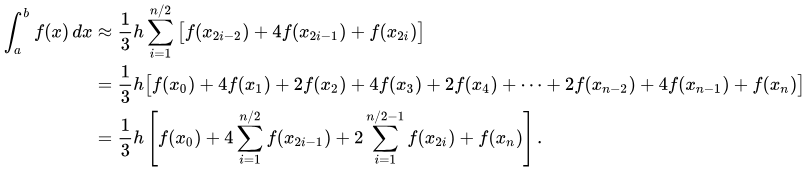

In [46]:
def simpson_13_rule(a,b,n):
    x        = np.linspace(0, 3, n+1)
    y        = 1 - np.exp(-x)
    integral = np.sum(y[:-1:2]) * 2 + np.sum(y[1:-1:2]) * 4 + y[0] + y[-1]
    integral *= (b-a)/(3*n)
    return integral

In [47]:
print(f"Simpson's 1/3 rule (n=1): {simpson_13_rule(0,3,1)}")

Simpson's 1/3 rule (n=1): 0.950212931632136


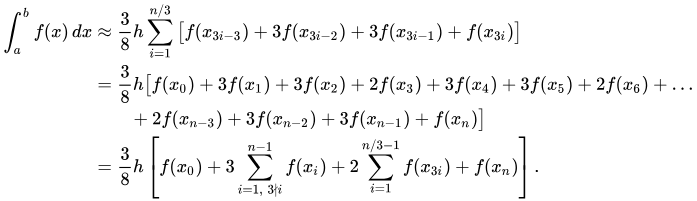

In [48]:
def simpson_38_rule(a, b, n):
    h = (b - a)/(n - 1)
    x = np.linspace(a, b, n)
    y = 1 - np.exp(-x)       #f(x) to be integrated

    integral = y[0] + y[-1]
    for i in range(1, n-1, 3):
        integral += 3 * y[i]    #3*f(x1) + 3*f(x4) + 3*f(x7) + .
    for i in range(2, n-1, 3):
        integral += 3 * y[i]    #3*f(x2) + 3*f(x5) + 3*f(x8) + ...
    for i in range(3, n-1, 3):
        integral += 2 * y[i]    #2*f(x3) + 2*f(x6) + 2*f(x9) + ...
    integral *= 3 * h / 8

    return integral

In [51]:
print(f"Simpson's 3/8 rule (n=10): {simpson_38_rule(0,3,10)}")

Simpson's 3/8 rule (n=10): 2.0496442142344247


In [55]:
def percent_relative_error(numerical_result, analytical_result):
    return abs((numerical_result - analytical_result) / analytical_result) * 100

print(f"Percent relative error for n=1 trapezoidal rule  : {percent_relative_error(trapezoidal_rule(0,3,1), analytical_solution()):.2f}%")

print(f"Percent relative error for n=1 Simpson's 1/3 rule: {percent_relative_error(simpson_13_rule(0,3,1), analytical_solution()):.2f}%")

print(f"Percent relative error for Simpson's 3/8 rule    : {percent_relative_error(simpson_38_rule(0,3,10), analytical_solution()):.2f}%")

Percent relative error for n=1 trapezoidal rule  : 30.47%
Percent relative error for n=1 Simpson's 1/3 rule: 53.64%
Percent relative error for Simpson's 3/8 rule    : 0.01%


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz, simps

The approximate integral using Simpson's method is: 16.81791


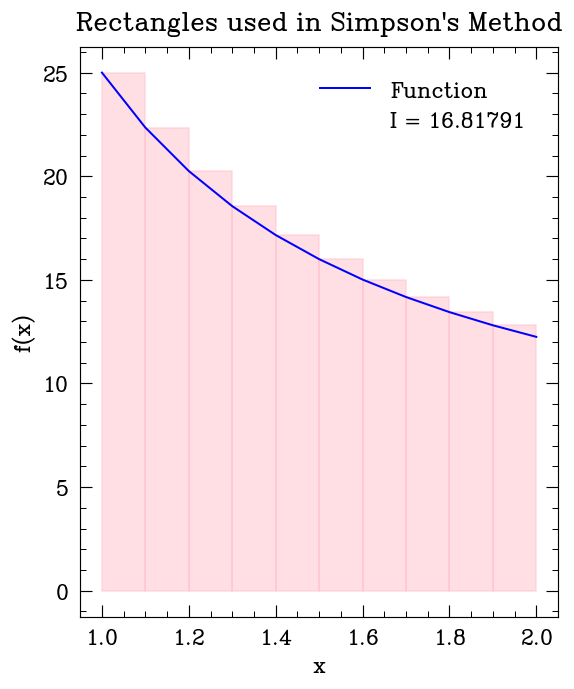

In [86]:
from scipy.integrate import simps

def integrand(x):
    return ((2*x + 3)/x)**2

a = 1
b = 2
n = 10

x = np.linspace(a, b, n+1)
y = integrand(x)

area = simps(y, x)
print(f"The approximate integral using Simpson's method is: {area:.5f}")

fig, ax = plt.subplots(figsize=(5, 6))
ax.plot(x, y, color='blue', label='Function')

for i in range(n):
    rect_x = [x[i], x[i], x[i+1], x[i+1]]
    rect_y = [0, y[i], y[i], 0]
    ax.fill(rect_x, rect_y, color='pink', alpha=0.5)

ax.set_title('Rectangles used in Simpson\'s Method')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# Add the numerical result to the legend
ax.plot([], [], ' ', label=f"I = {area:.5f}")

ax.legend()
ax.legend()
plt.tight_layout()
plt.show()

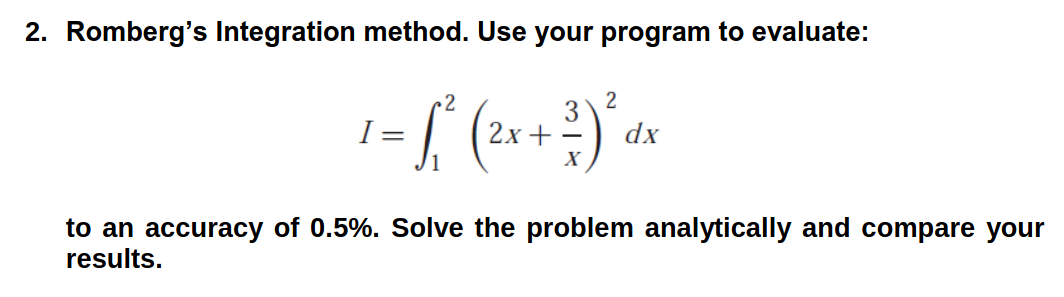

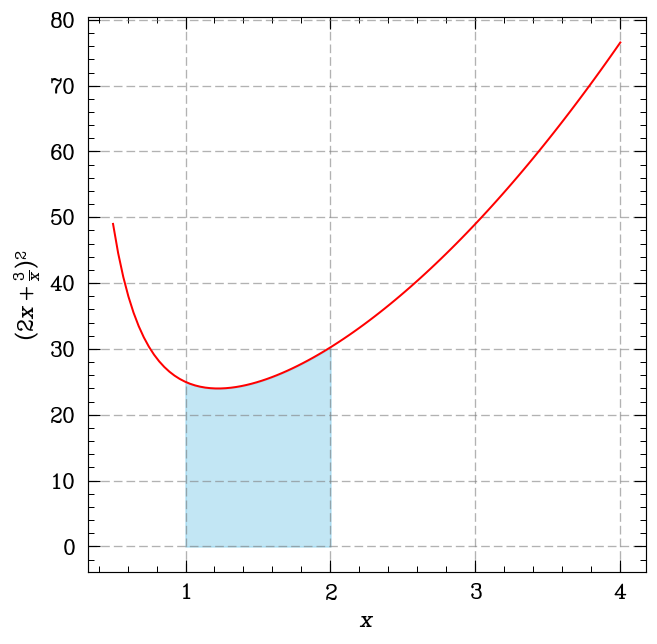

In [75]:
def func(x):
  return ((2*x + 3/x))**2

x = np.linspace(0.5, 4, 100)
y = func(x)

plt.plot(x, y, color='red')
plt.xlabel(r"$x$")
plt.ylabel(r'$(2x+\frac{3}{x})^{2}$')
plt.grid(True)

x_fill = np.linspace(1, 2, 100)
y_fill = func(x_fill)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5)

plt.show()

In [68]:
from scipy import integrate
from scipy.special import erf
import numpy as np

funky = lambda x: ((2*x + 3)/x)**2
result = integrate.romberg(funky, 1, 2, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7ffb3b1d3c70> from [1, 2]

 Steps  StepSize   Results
     1  1.000000 18.625000 
     2  0.500000 17.312500 16.875000 
     4  0.250000 16.945230 16.822806 16.819327 
     8  0.125000 16.849900 16.818123 16.817811 16.817787 
    16  0.062500 16.825817 16.817789 16.817767 16.817766 16.817766 
    32  0.031250 16.819780 16.817768 16.817766 16.817766 16.817766 16.817766 

The final result is 16.817766166950427 after 33 function evaluations.


In [87]:
def integrand(x):
    return ((2*x + 3)/x)**2
def romberg_integration(a, b, tol=0.005):
    R = np.zeros((10, 10))

    # Initialize the first row with the trapezoidal rule
    h = b - a
    R[0, 0] = (h/2) * (integrand(a) + integrand(b))

    # Perform Romberg's method
    for i in range(1, 10):
        h  /= 2
        sum = 0
        for j in range(1, 2**i + 1):
            sum += integrand(a + (j - 0.5) * h)
        R[i, 0] = (R[i-1, 0] + h * sum) / 2

        for j in range(1, i+1):
            R[i, j] = (4**j * R[i, j-1] - R[i-1, j-1]) / (4**j - 1)

        if abs(R[i, i] - R[i-1, i-1]) < tol:
            return R[i, i]

    return R[9, 9]

# Evaluate the integral from 1 to 2
result = romberg_integration(1, 2, 0.005)
print(f"The approximate value of the integral is: {result:.5f}")

The approximate value of the integral is: 16.82089


Exact integral value (2): 25.83
Computed integral value: 16.81776616671937
Absolute error: 14.81776616671937


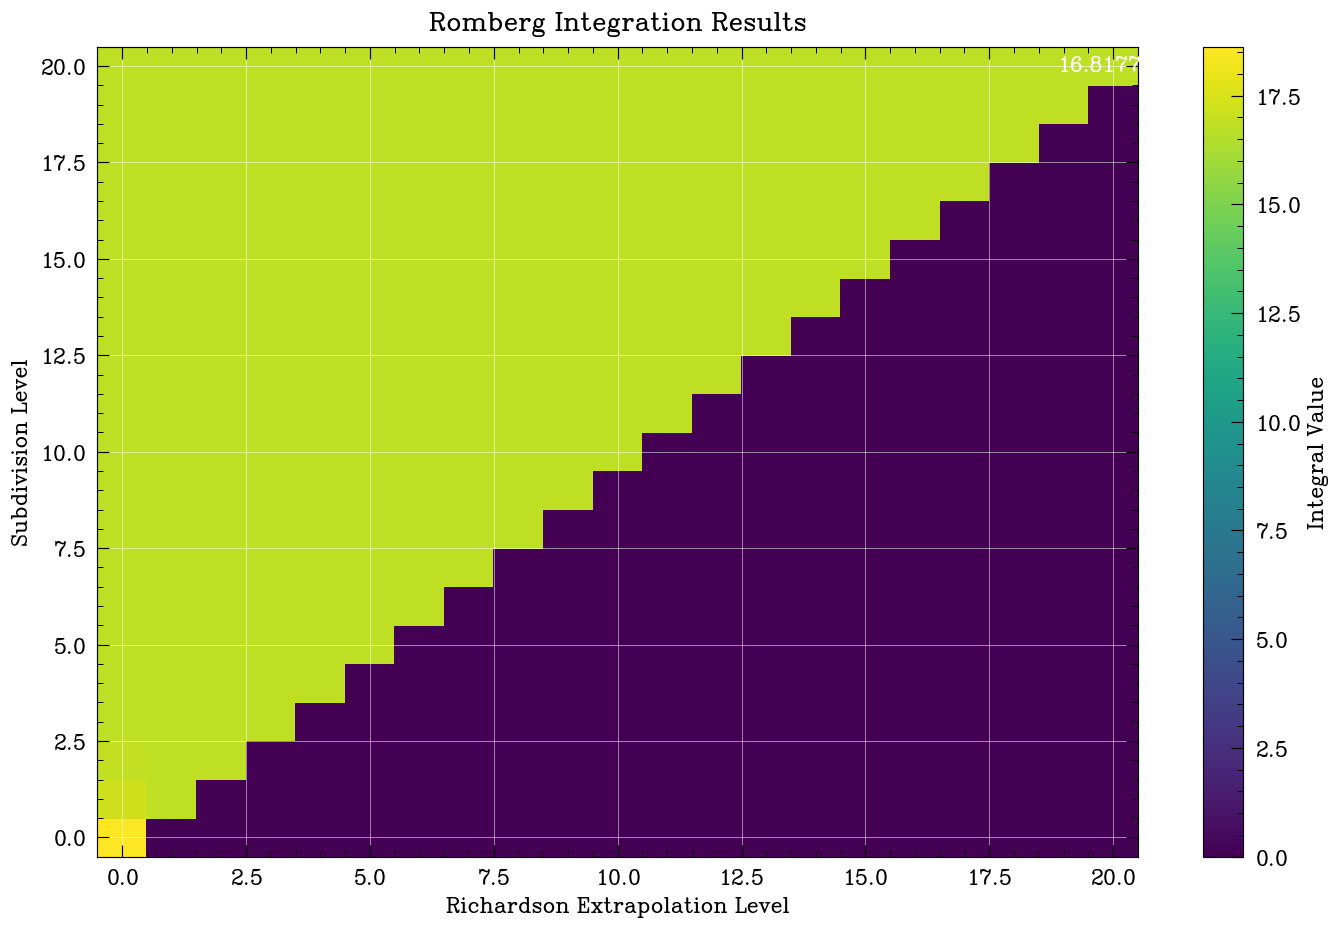

In [88]:
def romberg(f, a, b, n):
    r = np.array([[0] * (n+1)] * (n+1), float)
    h = b - a
    r[0,0] = 0.5 * h * (f(a) + f(b))

    powerOf2 = 1
    for i in range(1, n + 1):
        # Compute the halved stepsize and use this to sum the function at
        # all the new points (in between the points already computed)
        h = 0.5 * h

        sum = 0.0
        powerOf2 = 2 * powerOf2
        for k in range(1, powerOf2, 2):
            sum = sum + f(a + k * h)

        # Compute the composite trapezoid rule for the next level of
        # subdivision. Use Richardson extrapolation to refine these values
        # into a more accurate form.
        r[i,0] = 0.5 * r[i-1,0] + sum * h

        powerOf4 = 1
        for j in range(1, i + 1):
            powerOf4 = 4 * powerOf4
            r[i,j] = r[i,j-1] + (r[i,j-1] - r[i-1,j-1]) / (powerOf4 - 1)

    return r

# Example: Integrate sin(x) from 0 to π
def f(x):
    return ((2*x + 3)/x)**2

# Compute Romberg integration
n = 20  # number of recursion levels
result = romberg(f, 1,2, n)

# Plot the Romberg integration results
plt.figure(figsize=(12, 8))
plt.imshow(result, cmap='viridis', aspect='auto')
plt.colorbar(label='Integral Value')
plt.title('Romberg Integration Results')
plt.xlabel('Richardson Extrapolation Level')
plt.ylabel('Subdivision Level')

plt.text(n, n, f'{result[n,n]:.6f}',
         horizontalalignment='center',
         verticalalignment='center',
         color='white')

plt.grid(color='white', linestyle='-', linewidth=0.5)

print(f"Exact integral value (2): {25.83}")
print(f"Computed integral value: {result[n,n]}")
print(f"Absolute error: {abs(2 - result[n,n])}")

plt.tight_layout()
plt.show()

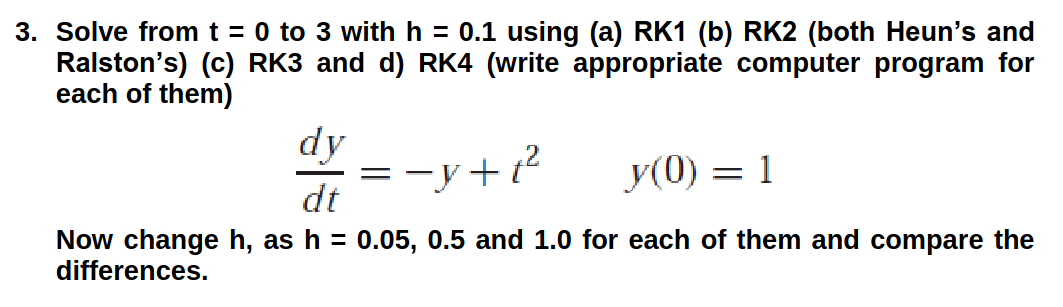

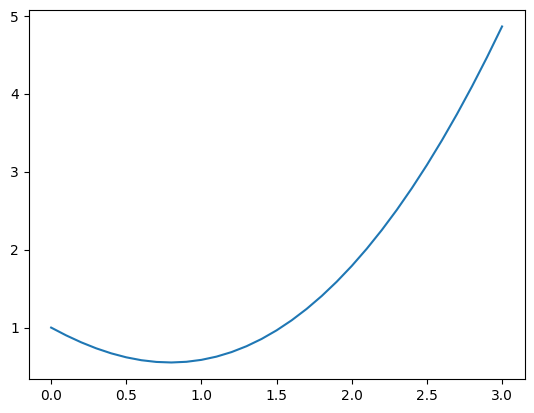

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def de(t, y):
    return -y + t**2

t = np.linspace(0, 3, 31)
y = np.zeros_like(t)
y[0] = 1

h = 0.1
for i in range(len(t)-1):
    y[i+1] = y[i] + h * de(t[i], y[i])

plt.plot(t, y, label='RK1 (Euler)')

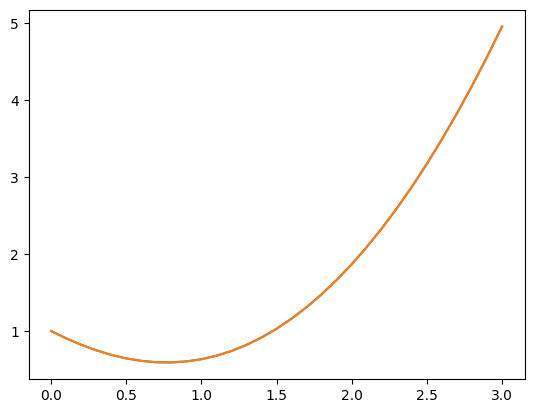

In [12]:
def rk2_heun(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + h, y + k1)
    return y + (k1 + k2) / 2

def rk2_ralston(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + 2*h/3, y + 2*k1/3)
    return y + (k1 + 3*k2) / 4

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk2_heun(t[i], y[i], h)

plt.plot(t, y, label='RK2 (Heun)')

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk2_ralston(t[i], y[i], h)

plt.plot(t, y, label='RK2 (Ralston)')

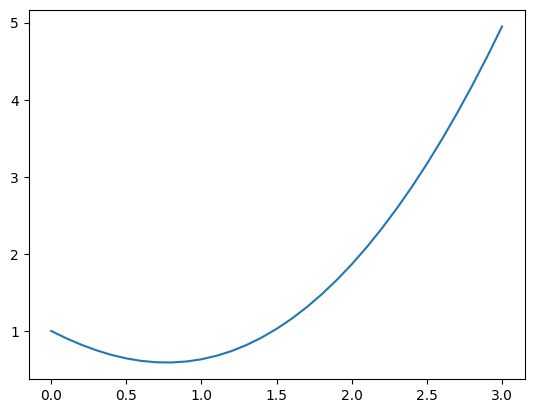

In [13]:
def rk3(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + h/2, y + k1/2)
    k3 = h * de(t + h, y - k1 + 2*k2)
    return y + (k1 + 4*k2 + k3) / 6

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk3(t[i], y[i], h)

plt.plot(t, y, label='RK3')

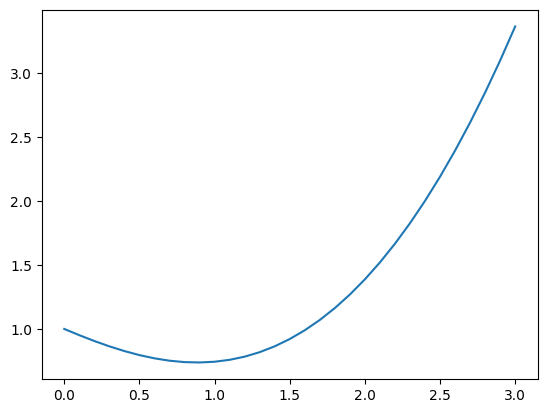

In [16]:
def rk4(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + h/2, y + k1/2)
    k3 = h * de(t + h/2, y + k2/2)
    k4 = h * de(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk4(t[i], y[i], h)

plt.plot(t, y, label='RK4')

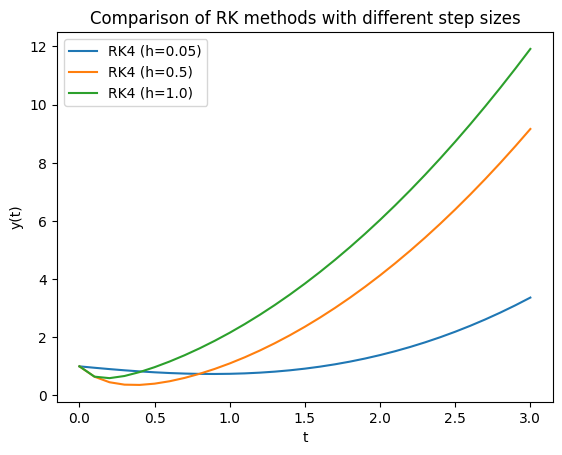

In [17]:
h_values = [0.05, 0.5, 1.0]

for h in h_values:
    y = np.zeros_like(t)
    y[0] = 1

    for i in range(len(t)-1):
        y[i+1] = rk4(t[i], y[i], h)

    plt.plot(t, y, label=f'RK4 (h={h})')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of RK methods with different step sizes')
plt.legend()
plt.show()

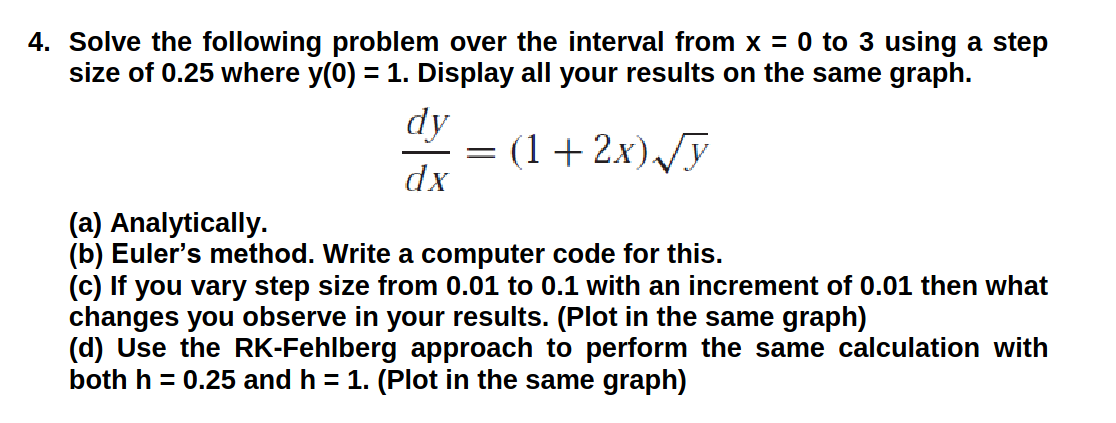

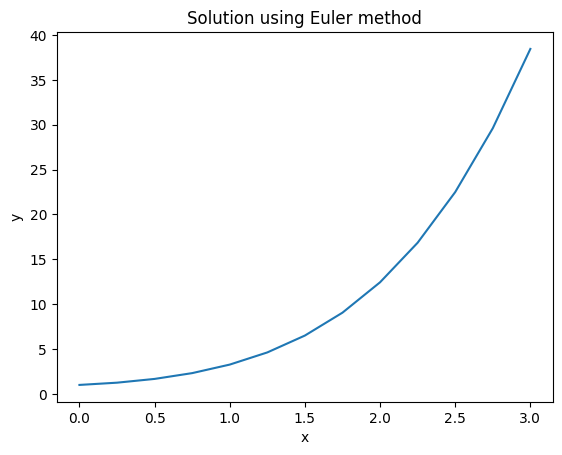

In [9]:
def de(x, y):
    return (1 + 2*x) * np.sqrt(y)


x = np.linspace(0, 3, 13)
y = np.zeros_like(x)
y[0] = 1


h = 0.25
for i in range(len(x)-1):
    y[i+1] = y[i] + h * de(x[i], y[i])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution using Euler method')
plt.show()

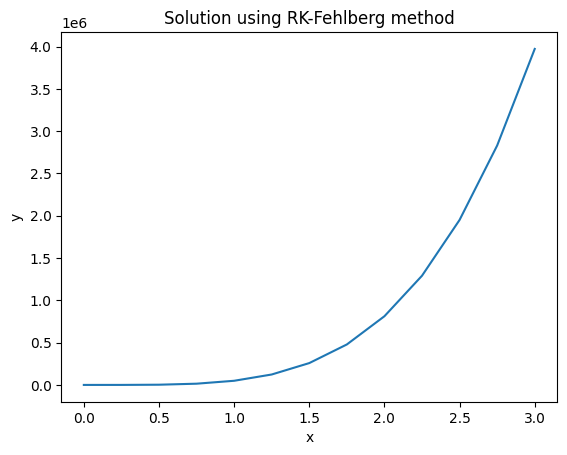

In [10]:
def de(x, y):
    return (1 + 2*x) * np.sqrt(y)


def rk_fehlberg(x, y, h):
    k1 = h * de(x, y)
    k2 = h * de(x + h/4, y + k1/4)
    k3 = h * de(x + 3*h/8, y + 3*k1/32 + 9*k2/32)
    k4 = h * de(x + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
    k5 = h * de(x + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
    k6 = h * de(x + h/2, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
    y_next = y + (16*k1 + 6784*k3 + 28561*k4 - 9*k5 + 2*k6)/90
    return y_next

x = np.linspace(0, 3, 13)
y = np.zeros_like(x)
y[0] = 1

h = 0.25
for i in range(len(x)-1):
    y[i+1] = rk_fehlberg(x[i], y[i], h)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution using RK-Fehlberg method')
plt.show()

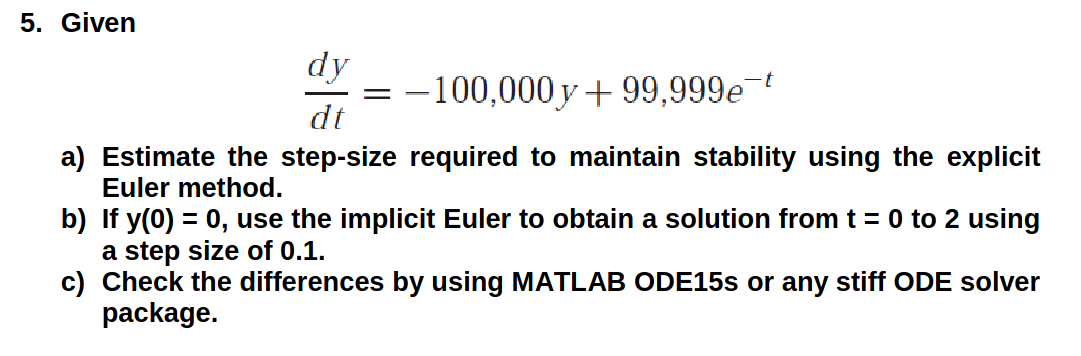

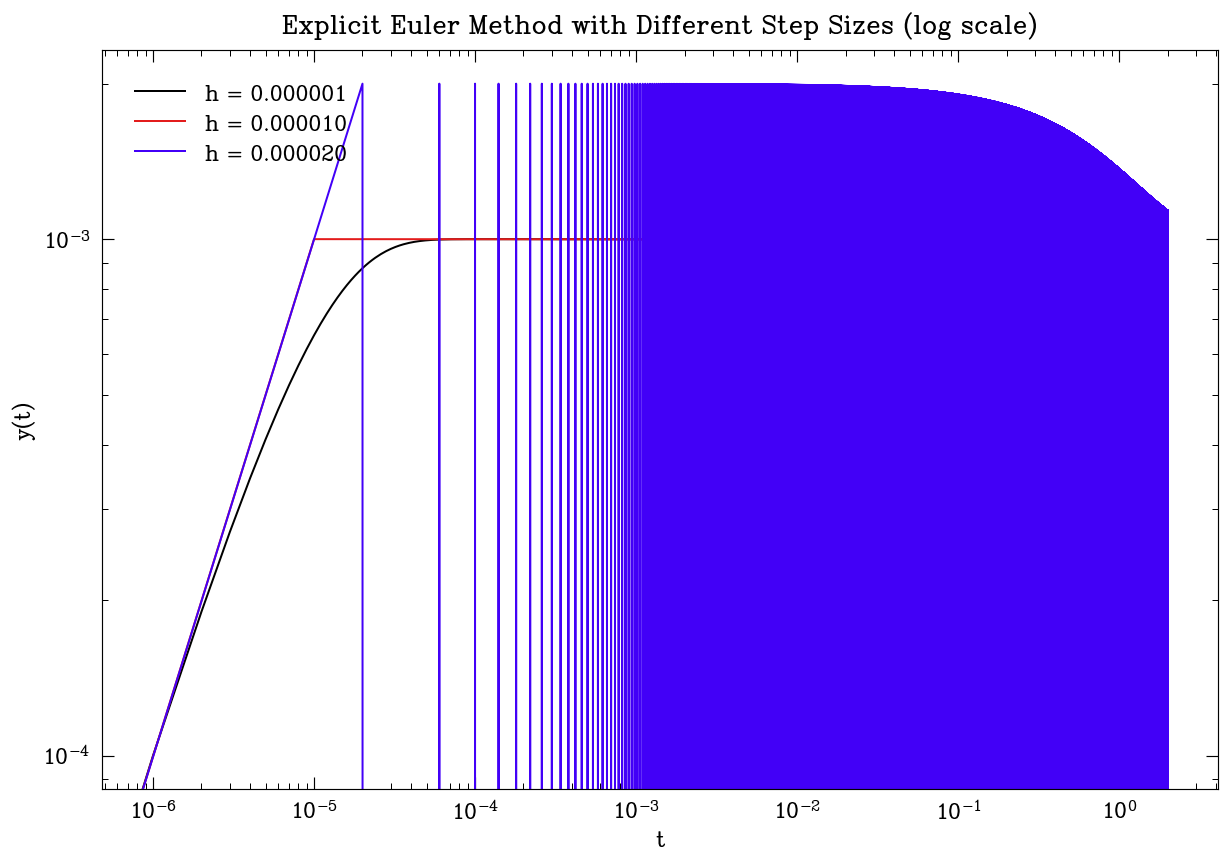

In [103]:
def dydt(t, y):
    return -100000*y + 99.999*np.exp(-t)

def explicit_euler(t0, y0, t_end, h):
    t = t0
    y = y0
    t_list = [t0]
    y_list = [y0]

    while t < t_end:
        y_new = y + h*dydt(t, y)
        y = y_new
        t += h
        t_list.append(t)
        y_list.append(y)

    return t_list, y_list

step_sizes = [1e-6,1e-5,2e-5]

fig, ax = plt.subplots(figsize=(12, 8))

for h in step_sizes:
    t, y = explicit_euler(0, 0, 2, h)
    ax.plot(t, y, label=f"h = {h:.6f}")


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.set_title("Explicit Euler Method with Different Step Sizes (log scale)")
ax.legend()
plt.show()

In [104]:
dt_max = 0.00001
print(f"Maximum step-size for stability using explicit Euler: {dt_max:.5f}")

Maximum step-size for stability using explicit Euler: 0.00001


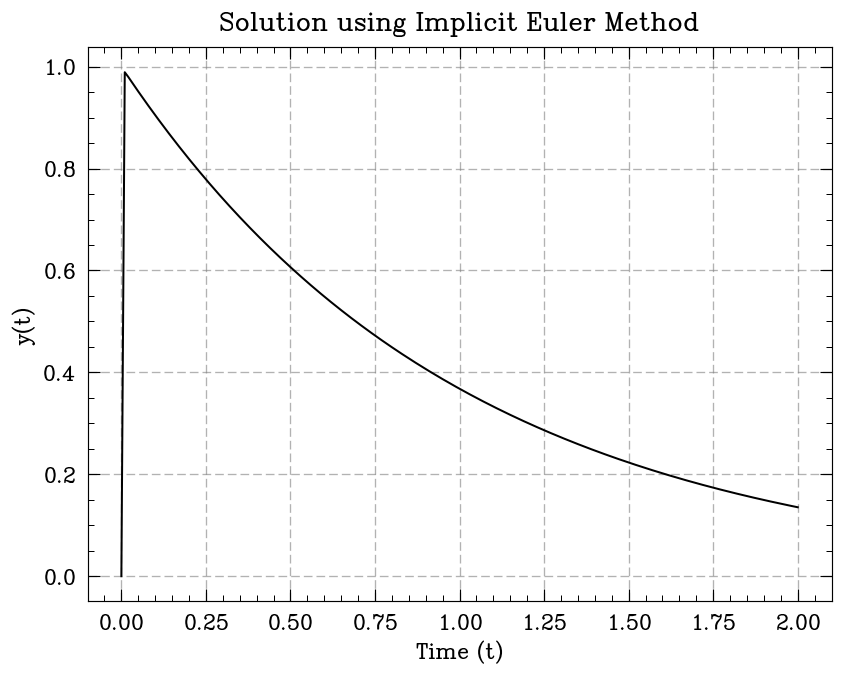

In [105]:
# Given differential equation
dy_dt = lambda y, t: -100000 * y + 99999 * np.exp(-t)

# b) Solving using implicit Euler method with step-size 0.1
t0 = 0
t_end = 2
dt = 0.01
t = np.arange(t0, t_end + dt, dt)
y = np.zeros_like(t)
y[0] = 0  # Initial condition

for i in range(len(t)-1):
    y[i+1] = (y[i] + 99999 * dt * np.exp(-(t[i+1]))) / (1 + 100000 * dt)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(t, y)
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Solution using Implicit Euler Method')
plt.grid()
plt.show()

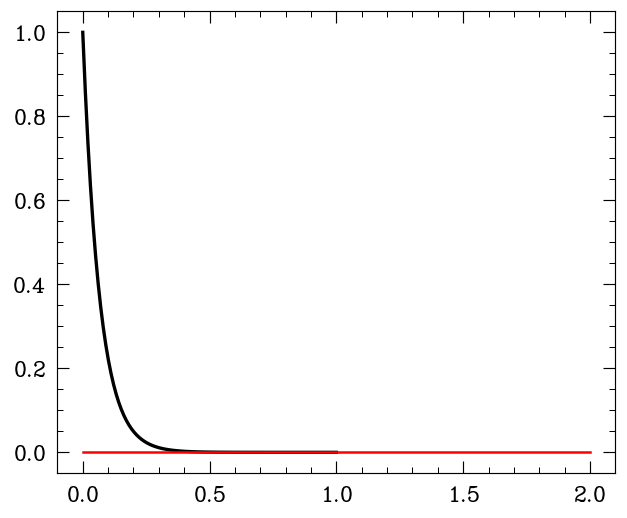

In [108]:
x = np.linspace(0,1,100)

lam =  -15    #lambda
h   =  0.1    #step size

a   =  0      # left  endpoint of grid
b   =  2      # right endpoint of grid
y_0 =  0      # intitial Boundary condition y(0)=1

def euler_explicit(f_prime, y_0, a, b, h): #defining the euler method
    N=int((b-a)/h)                         #Number of steps
    x = a ; y = y_0                        #Initial Values to the equation y(0) and x(0)
    x_out,y_out =[a],[y_0]
    for i in range(N):
        y = y + h*f_prime(x, y)            #y_n+1 = y_n + h * f
        x = x + h
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out
def solution(x):
   return np.exp(lam*x)
def f_prime(x, y):
  return lam*y
x_euler, y_euler = euler_explicit(f_prime, y_0, a, b, h)  #call the function and store the values in x and y
#plt.xlim([0,2])#plt.ylim([0.7,1.1])
plt.figure(figsize=(6,5))
plt.plot(x,solution(x),linewidth=2.0,color='black',label=r'')
plt.plot(x_euler,y_euler,linewidth=1.5,color='red',label=r'')
plt.xlabel(r'',fontsize=15);plt.ylabel(r'',fontsize=15)
plt.legend(loc='upper right')

In [3]:
from scipy.integrate import solve_ivp

def dv_dt(t, v):
    return -100000 * v + 99999 * np.exp(-t)

t_span = (0, 2)
v0 = 0
t_eval = np.arange(t_span[0], t_span[1] + 0.1, 0.1)

sol = solve_ivp(dv_dt, t_span, [v0], method='BDF', t_eval=t_eval)

print("Solution using the stiff ODE solver (MATLAB ODE15s equivalent):")
print(sol.t)
print(sol.y[0])

Solution using the stiff ODE solver (MATLAB ODE15s equivalent):
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
[0.         0.90483666 0.81873084 0.74090243 0.67045887 0.60653891
 0.54896049 0.49680029 0.44933838 0.40656725 0.36788345 0.33290494
 0.30123091 0.27254826 0.24662641 0.2231289  0.20189216 0.18268278
 0.16529214 0.14956285 0.13533529]


ValueError: could not broadcast input array from shape (3,) into shape (2,)

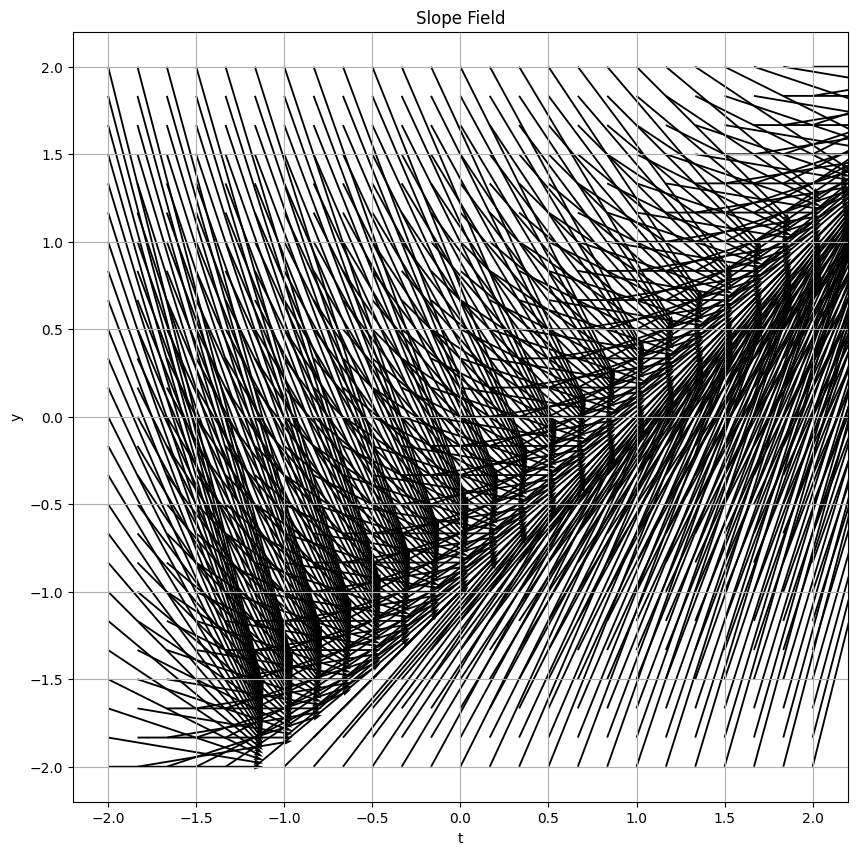

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def f(t, y):
    return t - y

# Create the slope field
t = np.linspace(-2, 2, 25)
y = np.linspace(-2, 2, 25)
T, Y = np.meshgrid(t, y)
F = f(T, Y)

# Plot the slope field
fig, ax = plt.subplots(figsize=(10, 10))
ax.quiver(T, Y, np.ones_like(F), F, scale=5)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Slope Field')
plt.grid()

# Solve the differential equation using different methods
t_span = [0, 2]
y0 = 1

# RK4
def rk4(f, t_span, y0, n=100):
    t = np.linspace(t_span[0], t_span[1], n+1)
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5 * (t[1] - t[0]), y[i] + 0.5 * (t[1] - t[0]) * k1)
        k3 = f(t[i] + 0.5 * (t[1] - t[0]), y[i] + 0.5 * (t[1] - t[0]) * k2)
        k4 = f(t[i] + (t[1] - t[0]), y[i] + (t[1] - t[0]) * k3)
        y[i+1] = y[i] + (t[1] - t[0]) * (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

# RK1 (Euler's method)
def rk1(f, t_span, y0, n=100):
    t = np.linspace(t_span[0], t_span[1], n+1)
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + (t[1] - t[0]) * f(t[i], y[i])
    return t, y

# Adams-Bashforth method
def adams_bashforth(f, t_span, y0, n=100):
    t = np.linspace(t_span[0], t_span[1], n+1)
    y = np.zeros_like(t)
    y[0] = y0

    # Compute the first two steps using RK4
    t_rk4, y_rk4 = rk4(f, t_span, y0, 2)
    y[:2] = y_rk4

    for i in range(1, n):
        y[i+1] = y[i] + (t[1] - t[0]) * (3/2 * f(t[i], y[i]) - 1/2 * f(t[i-1], y[i-1]))
    return t, y

# Predictor-Corrector method
def predictor_corrector(f, t_span, y0, n=100):
    t = np.linspace(t_span[0], t_span[1], n+1)
    y = np.zeros_like(t)
    y[0] = y0

    # Compute the first two steps using RK4
    t_rk4, y_rk4 = rk4(f, t_span, y0, 2)
    y[:2] = y_rk4

    for i in range(1, n):
        # Predictor step
        y_pred = y[i] + (t[1] - t[0]) * f(t[i], y[i])

        # Corrector step
        y[i+1] = y[i] + (t[1] - t[0]) * (f(t[i], y[i]) + f(t[i+1], y_pred)) / 2
    return t, y

# Plot the solutions
t_rk4, y_rk4 = rk4(f, t_span, y0)
t_rk1, y_rk1 = rk1(f, t_span, y0)
t_ab, y_ab = adams_bashforth(f, t_span, y0)
t_pc, y_pc = predictor_corrector(f, t_span, y0)

fig, ax = plt.subplots(figsize=(10, 10))
ax.quiver(T, Y, np.ones_like(F), F, scale=5)
ax.plot(t_rk4, y_rk4, label='RK4')
ax.plot(t_rk1, y_rk1, label='RK1 (Euler)')
ax.plot(t_ab, y_ab, label='Adams-Bashforth')
ax.plot(t_pc, y_pc, label='Predictor-Corrector')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Solutions on Slope Field')
ax.legend()
plt.grid()
plt.show()